## 켄 피셔 미국 가치전략
- PSR, PRR <- 필요한 지표는 시가총액, 매출액, 연구개발비

### 재무제표 가져올 수 있는 API 있는지 확인

1. yfinance

In [1]:
import yfinance as yf
import pandas as pd

msft = yf.Ticker("MSFT")

msft.info

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}

In [2]:
msft.major_holders

,0,1
0,0.05%,% of Shares Held by All Insider
1,73.77%,% of Shares Held by Institutions
2,73.80%,% of Float Held by Institutions
3,6159,Number of Institutions Holding Shares


In [15]:
hist = msft.history(period="5d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-05,335.089996,341.649994,334.730011,338.149994,18172400,0,0
2023-07-06,337.299988,342.989990,335.500000,341.269989,28161200,0,0
2023-07-07,339.320007,341.790009,337.000000,337.220001,21185300,0,0
2023-07-10,334.600006,335.230011,327.589996,331.829987,32791400,0,0
2023-07-11,331.059998,332.859985,327.000000,332.470001,26665400,0,0


In [56]:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
# - cash flow statement
# msft.cashflow
# msft.quarterly_cashflow

msft.earnings_dates

KeyError: 'exchangeTimezoneName'

In [57]:
msft.news[0]

{'uuid': '03289bcf-c04a-3d47-a73c-e50c23936c0d',
 'title': 'PRESS DIGEST- Wall Street Journal - July 12',
 'publisher': 'Reuters',
 'link': 'https://finance.yahoo.com/news/press-digest-wall-street-journal-053711273.html',
 'providerPublishTime': 1689140231,
 'type': 'STORY',
 'relatedTickers': ['MSFT', 'VIVHY']}

In [12]:
from datetime import datetime

for dic in msft.news:
    print(dic['providerPublishTime'], datetime.fromtimestamp(dic['providerPublishTime']))

1689031302 2023-07-11 08:21:42
1689028152 2023-07-11 07:29:12
1689027147 2023-07-11 07:12:27
1689024140 2023-07-11 06:22:20
1689021237 2023-07-11 05:33:57
1689020508 2023-07-11 05:21:48
1689019631 2023-07-11 05:07:11
1689016380 2023-07-11 04:13:00


In [3]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",649516597,2023-03-30,0.0874,215529083660
1,Blackrock Inc.,537573096,2023-03-30,0.0723,178382873227
2,State Street Corporation,292106885,2023-03-30,0.0393,96929823727
3,"FMR, LLC",200523373,2023-03-30,0.0270,66539668170
4,Price (T.Rowe) Associates Inc,166035734,2023-03-30,0.0223,55095635383
5,"Geode Capital Management, LLC",144365760,2023-03-30,0.0194,47904888202
6,Morgan Stanley,120316895,2023-03-30,0.0162,39924753652
7,JP Morgan Chase & Company,94617741,2023-03-30,0.0127,31397003725
8,Capital World Investors,87608980,2023-03-30,0.0118,29071286657
9,Norges Bank Investment Management,86316926,2022-12-30,0.0116,28642544395


In [3]:
import numpy as np

us_df = equities.select(country="United States")

us_df = us_df.loc[(us_df['market_cap'] == 'Small Cap') | (us_df['market_cap'] == 'Micro Cap')
 | (us_df['market_cap'] == 'Nano Cap') | (us_df['market_cap'] == np.nan)]

us_df = us_df.reset_index(drop=False)
us_df.columns
us_df['symbol'], us_df.info()

# cate = equities.options('symbol', country='United States')
# cate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   symbol           10108 non-null  object
 1   name             10108 non-null  object
 2   summary          8690 non-null   object
 3   currency         10025 non-null  object
 4   sector           9603 non-null   object
 5   industry_group   9613 non-null   object
 6   industry         9610 non-null   object
 7   exchange         10108 non-null  object
 8   market           10108 non-null  object
 9   country          10108 non-null  object
 10  state            8727 non-null   object
 11  city             8726 non-null   object
 12  zipcode          8715 non-null   object
 13  website          7109 non-null   object
 14  market_cap       10108 non-null  object
 15  isin             1175 non-null   object
 16  cusip            720 non-null    object
 17  figi             533 non-null  

(0         AABB
 1          AAC
 2         AACI
 3        AACIU
 4        AACIW
          ...  
 10103     ZYJT
 10104     ZYNE
 10105     ZYRX
 10106     ZYXI
 10107    ZZZOF
 Name: symbol, Length: 10108, dtype: object,
 None)

In [162]:
us_df['market'].unique(), us_df['exchange'].unique()

(array(['OTC Bulletin Board', 'New York Stock Exchange',
        'NASDAQ Global Select', 'NYSE MKT', 'Nordic Growth Market',
        'NASDAQ Capital Market'], dtype=object),
 array(['PNK', 'NYQ', 'NMS', 'ASE', 'NGM', 'NCM', 'NYS', 'NAS'],
       dtype=object))

In [164]:
us_df.loc[~(us_df['market'] == 'OTC Bulletin Board') | (us_df['market'] == 'Nordic Growth Market')] # 'OTC Bulletin Board', 'Nordic Growth Market'. 5960

,symbol,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
1,AAC,Ares Acquisition Corporation,Ares Acquisition Corporation focuses on effect...,USD,Financials,Diversified Financials,Diversified Financial Services,NYQ,New York Stock Exchange,United States,NY,New York,10167,NaN,Small Cap,AU000000AAC9,NaN,NaN,NaN,NaN
2,AACI,Armada Acquisition Corp. I Common Stock,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
3,AACIU,Armada Acquisition Corp. I Unit,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
4,AACIW,Armada Acquisition Corp. I Warrant,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
6,AADI,Aadi Bioscience Inc. Common Stock,NaN,USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,ZWRK,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
10101,ZWRKU,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
10102,ZWRKW,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
10104,ZYNE,"Zynerba Pharmaceuticals, Inc.","Zynerba Pharmaceuticals, Inc. operates as a cl...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,NGM,Nordic Growth Market,United States,PA,Devon,19333,http://zynerba.com,Nano Cap,US98986X1090,98986X109,NaN,NaN,NaN


In [4]:
us_df = us_df.loc[(us_df['exchange'] == 'NYQ') | (us_df['exchange'] == 'NMS')
 | (us_df['exchange'] == 'ASE') | (us_df['exchange'] == 'NCM') | (us_df['exchange'] == 'NYS') | (us_df['exchange'] == 'NAS')] # 5764

In [5]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 1 to 10106
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   symbol           5764 non-null   object
 1   name             5764 non-null   object
 2   summary          4362 non-null   object
 3   currency         5681 non-null   object
 4   sector           5651 non-null   object
 5   industry_group   5661 non-null   object
 6   industry         5658 non-null   object
 7   exchange         5764 non-null   object
 8   market           5764 non-null   object
 9   country          5764 non-null   object
 10  state            4389 non-null   object
 11  city             4389 non-null   object
 12  zipcode          4386 non-null   object
 13  website          3795 non-null   object
 14  market_cap       5764 non-null   object
 15  isin             913 non-null    object
 16  cusip            629 non-null    object
 17  figi             533 non-null   

In [171]:
us_df['symbol']

1          AAC
2         AACI
3        AACIU
4        AACIW
6         AADI
         ...  
10097     ZVSA
10100     ZWRK
10101    ZWRKU
10102    ZWRKW
10106     ZYXI
Name: symbol, Length: 5764, dtype: object

In [21]:
us_df['market_cap'].value_counts() # T. 10108 -> 5764

Mega Cap    63
Name: market_cap, dtype: int64

In [20]:
US_SmallCap_Symbols = us_df['symbol'].loc[us_df['market_cap'] == 'Small Cap'] # symbol
US_SmallCap_Symbols

Series([], Name: symbol, dtype: object)

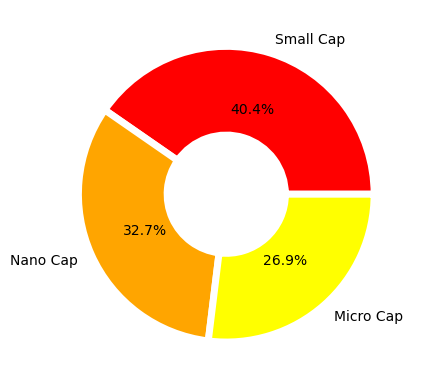

In [7]:
import matplotlib.pyplot as plt

ratio = [v for v in us_df['market_cap'].value_counts()]
labels = ['Small Cap', 'Nano Cap', 'Micro Cap']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors = ['red', 'orange', 'yellow'], wedgeprops=wedgeprops)
plt.show()

In [17]:
print(US_SmallCap_Symbols[:10])

Series([], Name: symbol, dtype: object)


/tmp/ipykernel_15850/1113544467.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(US_SmallCap_Symbols[:10])


In [14]:
from yfinance.utils import get_json
from yfinance import download

fundamentals = {}
for symbol in US_SmallCap_Symbols[:10]:
    fundamentals[symbol] = get_json( "https://finance.yahoo.com/quote/" + symbol)

stocks = download(list(US_SmallCap_Symbols[:10]))

[*********************100%***********************]  0 of 0 completed

/tmp/ipykernel_15850/1129300795.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for symbol in US_SmallCap_Symbols[:10]:
/tmp/ipykernel_15850/1129300795.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  stocks = download(list(US_SmallCap_Symbols[:10]))


ValueError: No objects to concatenate

In [180]:
stocks

Adj Close                                                        \
                 AAC AAIN        AAN        AAT ABR-PA ABR-PB ABR-PC  ABUS   
Date                                                                         
2020-11-25       NaN  NaN  24.811665  27.251051    NaN    NaN    NaN  3.77   
2020-11-27       NaN  NaN  20.879248  26.973980    NaN    NaN    NaN  4.34   
2020-11-30       NaN  NaN  17.967394  25.642265    NaN    NaN    NaN  4.53   
2020-12-01       NaN  NaN  17.237085  25.990837    NaN    NaN    NaN  3.99   
2020-12-02       NaN  NaN  17.087278  26.518160    NaN    NaN    NaN  3.95   
...              ...  ...        ...        ...    ...    ...    ...   ...   
2011-01-06       NaN  NaN        NaN        NaN    NaN    NaN    NaN  4.85   
2011-01-07       NaN  NaN        NaN        NaN    NaN    NaN    NaN  5.15   
2011-01-10       NaN  NaN        NaN        NaN    NaN    NaN    NaN  5.37   
2011-01-11       NaN  NaN        NaN        NaN    NaN    NaN    NaN  5.75   
2011-01-12       NaN  NaN        NaN        NaN    NaN    NaN    NaN  5.55   

                            ... Volume                                   \
                   AC ACBI  ...    AAC AAIN        AAN       AAT ABR-PA   
Date                        ...                                           
2020-11-25  36.940392  NaN  ...    NaN  NaN     1200.0  400200.0    NaN   
2020-11-27  37.924686  NaN  ...    NaN  NaN     5200.0   97700.0    NaN   
2020-11-30  37.747044  NaN  ...    NaN  NaN    65100.0  452500.0    NaN   
2020-12-01  37.115463  NaN  ...    NaN  NaN  8782600.0  462400.0    NaN   
2020-12-02  36.365456  NaN  ...    NaN  NaN  2105400.0  203700.0    NaN   
...               ...  ...  ...    ...  ...        ...       ...    ...   
2011-01-06        NaN  NaN  ...    NaN  NaN        NaN       NaN    NaN   
2011-01-07        NaN  NaN  ...    NaN  NaN        NaN       NaN    NaN   
2011-01-10        NaN  NaN  ...    NaN  NaN        NaN       NaN    NaN   
2011-01-11        NaN  NaN  ...    NaN  NaN        NaN       NaN    NaN   
2011-01-12        NaN  NaN  ...    NaN  NaN        NaN       NaN    NaN   

                                                 
           ABR-PB ABR-PC     ABUS       AC ACBI  
Date                                             
2020-11-25    NaN    NaN  1818800   3700.0  NaN  
2020-11-27    NaN    NaN  5350000   3800.0  NaN  
2020-11-30    NaN    NaN  5741200  10500.0  NaN  
2020-12-01    NaN    NaN  6478200   7800.0  NaN  
2020-12-02    NaN    NaN  3118400   7000.0  NaN  
...           ...    ...      ...      ...  ...  
2011-01-06    NaN    NaN     4200      NaN  NaN  
2011-01-07    NaN    NaN     3300      NaN  NaN  
2011-01-10    NaN    NaN    14800      NaN  NaN  
2011-01-11    NaN    NaN    51100      NaN  NaN  
2011-01-12    NaN    NaN     3800      NaN  NaN  

[4018 rows x 60 columns]

In [181]:
fundamentals

{'AAC': {},
 'AAIN': {},
 'AAN': {},
 'AAT': {},
 'ABR-PA': {},
 'ABR-PB': {},
 'ABR-PC': {},
 'ABUS': {},
 'AC': {},
 'ACBI': {}}

음... 재무제표가 안 들어온다. 시가총액이 큰 애로 시도해보자

In [8]:
import numpy as np

us_df = equities.select(country="United States")

us_df = us_df.loc[us_df['market_cap'] == 'Mega Cap']

us_df = us_df.reset_index(drop=False)

us_df = us_df.loc[(us_df['exchange'] == 'NYQ') | (us_df['exchange'] == 'NMS')
 | (us_df['exchange'] == 'ASE') | (us_df['exchange'] == 'NCM') | (us_df['exchange'] == 'NYS') | (us_df['exchange'] == 'NAS')] # 63개

us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 64
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   symbol           63 non-null     object
 1   name             63 non-null     object
 2   summary          61 non-null     object
 3   currency         63 non-null     object
 4   sector           61 non-null     object
 5   industry_group   61 non-null     object
 6   industry         61 non-null     object
 7   exchange         63 non-null     object
 8   market           63 non-null     object
 9   country          63 non-null     object
 10  state            61 non-null     object
 11  city             61 non-null     object
 12  zipcode          61 non-null     object
 13  website          61 non-null     object
 14  market_cap       63 non-null     object
 15  isin             26 non-null     object
 16  cusip            25 non-null     object
 17  figi             27 non-null     obje

In [9]:
us_df.head()

,symbol,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
0,AAPL,Apple Inc.,"Apple Inc. designs, manufactures, and markets ...",USD,Information Technology,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components",NMS,NASDAQ Global Select,United States,CA,Cupertino,95014,http://www.apple.com,Mega Cap,US0378331005,37833100,BBG000B9Y5X2,BBG000B9XRY4,BBG001S5N8V8
1,ABBV,AbbVie Inc.,"AbbVie Inc. discovers, develops, manufactures,...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,NYQ,New York Stock Exchange,United States,IL,North Chicago,60064-6400,http://www.abbvie.com,Mega Cap,US00287Y1091,00287Y109,BBG003P7K0B5,BBG0025Y4RY4,BBG0025Y4RZ3
2,ADBE,Adobe Inc.,Adobe Inc. operates as a diversified software ...,USD,Information Technology,Software & Services,Software,NMS,NASDAQ Global Select,United States,CA,San Jose,95110-2704,http://www.adobe.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
3,AMZN,"Amazon.com, Inc.","Amazon.com, Inc. engages in the retail sale of...",USD,Consumer Discretionary,Retailing,Internet & Direct Marketing Retail,NMS,NASDAQ Global Select,United States,WA,Seattle,98109-5210,http://www.amazon.com,Mega Cap,US0231351067,23135106,BBG000BVQ4Z3,BBG000BVPV84,BBG001S5PQL7
4,AVGO,Broadcom Inc.,"Broadcom Inc. designs, develops, and supplies ...",USD,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors & Semiconductor Equipment,NMS,NASDAQ Global Select,United States,CA,San Jose,95131-2313,http://www.broadcom.com,Mega Cap,NaN,NaN,BBG00KHY5SQ7,BBG00KHY5S69,BBG00KHY5SY8


In [10]:
US_MegaCap_Symbols = us_df['symbol']
US_MegaCap_Symbols

0       AAPL
1       ABBV
2       ADBE
3       AMZN
4       AVGO
       ...  
60    WFC-PX
61    WFC-PY
62    WFC-PZ
63       WMT
64       XOM
Name: symbol, Length: 63, dtype: object

In [23]:
from yfinance.utils import get_json
from yfinance import download

fundamentals = {}

fundamentals['AAPL'] = get_json( "https://finance.yahoo.com/quote/" + US_MegaCap_Symbols[0])

stocks = download(US_MegaCap_Symbols[0])

[*********************100%***********************]  1 of 1 completed


In [189]:
stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200


In [28]:
fundamentals

{'AAPL': {}}

AAPL 재무제표도 안 들어오는데..?!

2. pandas_datareader<br>
: FRED_GDP, DFEDTARU, Currency Exchange Rate

In [4]:
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2020, 1, 1)
end = datetime(2023, 7, 12)
gdp = web.DataReader('GDP', 'fred', start, end)

gdp.head()

,GDP
DATE,
2020-01-01,21538.032
2020-04-01,19636.731
2020-07-01,21362.428
2020-10-01,21704.706
2021-01-01,22313.850


In [14]:
start = datetime(2008, 12, 16)
# end = datetime(2023, 7, 12)
end = datetime.now().date()
DFEDTARU = web.DataReader('DFEDTARU', 'fred', start, end) # Federal Funds Target Range - Upper Limit

DFEDTARU.tail()

,DFEDTARU
DATE,
2023-07-08,5.25
2023-07-09,5.25
2023-07-10,5.25
2023-07-11,5.25
2023-07-12,5.25


In [15]:
from datetime import datetime

datetime.now().date()

datetime.date(2023, 7, 13)

In [32]:
import os

os.getenv('LOGNAME'), os.environ.get('LOGNAME'), os.environ['LOGNAME']

('jeon2', 'jeon2', 'jeon2')

In [34]:
# os.environ["ALPHAVANTAGE_API_KEY"] = "ZFSOXESHMT6BA9SD"
os.environ

environ{'CHROME_DESKTOP': 'code-url-handler.desktop',
        'CLASS_PATH': '/usr/lib/jvm/java-8-openjdk-amd64//lib:/usr/lib/jvm/java-8-openjdk-amd64//lib:',
        'CLUTTER_IM_MODULE': 'fcitx',
        'CONDA_DEFAULT_ENV': 'study',
        'CONDA_EXE': '/home/jeon2/anaconda3/bin/conda',
        'CONDA_PREFIX': '/home/jeon2/anaconda3/envs/study',
        'CONDA_PROMPT_MODIFIER': '(study) ',
        'CONDA_PYTHON_EXE': '/home/jeon2/anaconda3/bin/python',
        'CONDA_SHLVL': '2',
        'CUDADIR': '/usr/local/cuda-11.2',
        'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
        'DEBUGINFOD_URLS': 'https://debuginfod.ubuntu.com ',
        'DEFAULTS_PATH': '/usr/share/gconf/ubuntu.default.path',
        'DESKTOP_SESSION': 'ubuntu',
        'DISPLAY': ':0',
        'GDK_BACKEND': 'x11',
        'GDMSESSION': 'ubuntu',
        'GIO_LAUNCHED_DESKTOP_FILE': '/usr/share/applications/code.desktop',
        'GIO_LAUNCHED_DESKTOP_FILE_PID': '12527',
        'GJS_DEBUG_OUTPUT

In [55]:
web.DataReader("AAPL", "av-monthly", start=datetime(2023, 1, 1), end=datetime.now().date(), api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

web.DataReader("USD/KRW", "av-forex", api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

# web.get_sector_performance_av(api_key=os.getenv('ALPHAVANTAGE_API_KEY')) # KeyError: 'Meta Data'
# web.get_sector_performance_av()

,USD/KRW
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,KRW
To_Currency Name,South Korean Won
Exchange Rate,1275.90000000
Last Refreshed,2023-07-13 02:55:02
Time Zone,UTC
Bid Price,1275.86000000
Ask Price,1275.94000000


3. Alpha Vantage API<br>
: RSI

https://www.alphavantage.co/documentation/

In [ ]:
import requests

url = f'https://www.alphavantage.co/query?function=RSI&symbol=AMZN&interval=daily&time_period=14&series_type=close&apikey={os.environ["ALPHAVANTAGE_API_KEY"]}'
r = requests.get(url)
data = r.json()

data
data['Technical Analysis: RSI']

4. FinanceDatabase<br>
: 재무제표

In [56]:
! pip install FinanceDatabase

In [2]:
import financedatabase as fd

# cate = fd.select_equities(country='United States', industry='Resorts & Casinos') # AttributeError

# Initialize the Equities database
equities = fd.Equities()

# Obtain all countries from the database
equities_countries = equities.options('country')

# Obtain all sectors from the database
equities_sectors = equities.options('sector')

equities, equities_countries, equities_sectors # 11개 섹터

# ['Communication Services', 'Consumer Discretionary',
# 'Consumer Staples', 'Energy', 'Financials', 'Health Care',
# 'Industrials', 'Information Technology', 'Materials',
# 'Real Estate', 'Utilities']

(<financedatabase.Equities.Equities at 0x7f8981271300>,
 array(['Afghanistan', 'Anguilla', 'Argentina', 'Australia', 'Austria',
        'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belgium',
        'Belize', 'Bermuda', 'Botswana', 'Brazil',
        'British Virgin Islands', 'Cambodia', 'Canada', 'Cayman Islands',
        'Chile', 'China', 'Colombia', 'Costa Rica', 'Cyprus',
        'Czech Republic', 'Denmark', 'Dominican Republic', 'Egypt',
        'Estonia', 'Falkland Islands', 'Finland', 'France',
        'French Guiana', 'Gabon', 'Georgia', 'Germany', 'Ghana',
        'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Hong Kong',
        'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
        'Isle of Man', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Jersey',
        'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Latvia',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macau', 'Macedonia',
        'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia',
 

In [74]:
# Obtain all industries from a country from the database
equities_usa_industries = equities.options('industry', country='United States') # 61개 산업
equities_usa_industries

(array(['Aerospace & Defense', 'Air Freight & Logistics', 'Airlines',
        'Auto Components', 'Automobiles', 'Banks', 'Beverages',
        'Biotechnology', 'Building Products', 'Capital Markets',
        'Chemicals', 'Commercial Services & Supplies',
        'Communications Equipment', 'Construction & Engineering',
        'Construction Materials', 'Consumer Finance', 'Distributors',
        'Diversified Consumer Services', 'Diversified Financial Services',
        'Diversified Telecommunication Services', 'Electric Utilities',
        'Electrical Equipment',
        'Electronic Equipment, Instruments & Components',
        'Energy Equipment & Services', 'Entertainment',
        'Equity Real Estate Investment Trusts (REITs)',
        'Food & Staples Retailing', 'Gas Utilities',
        'Health Care Equipment & Supplies',
        'Health Care Providers & Services', 'Health Care Technology',
        'Hotels, Restaurants & Leisure', 'Household Durables',
        'Household Products', '

In [78]:
equities.select(country="United States", sector="Financials") # 4643개 Financials

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
AAC,Ares Acquisition Corporation,Ares Acquisition Corporation focuses on effect...,USD,Financials,Diversified Financials,Diversified Financial Services,NYQ,New York Stock Exchange,United States,NY,New York,10167,NaN,Small Cap,AU000000AAC9,NaN,NaN,NaN,NaN
AACI,Armada Acquisition Corp. I Common Stock,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
AACIU,Armada Acquisition Corp. I Unit,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
AACIW,Armada Acquisition Corp. I Warrant,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
AAIN,Arlington Asset Investment Corp 6.000% Senior ...,NaN,USD,Financials,Diversified Financials,Capital Markets,ASE,NYSE MKT,United States,NaN,NaN,NaN,NaN,Small Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWRK,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
ZWRKU,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
ZWRKW,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN


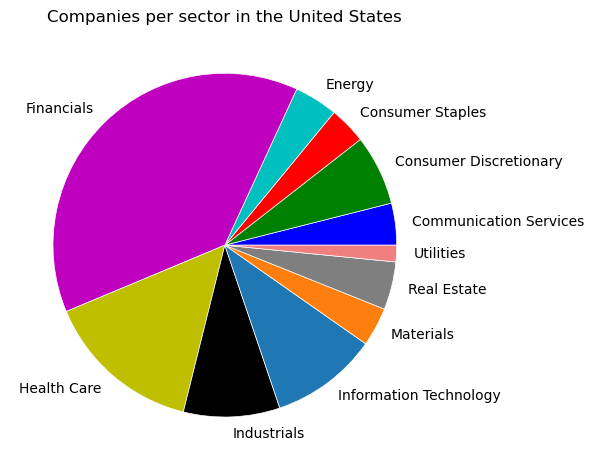

In [104]:
import matplotlib.pyplot as plt

equities_per_sector_united_states = {}

for sector in equities.options(selection='sector', country='United States'):
    try:
        equities_per_sector_united_states[sector] = len(equities.select(country='United States', sector=sector))
    except ValueError as error:
        print(error)

legend, values = zip(*equities_per_sector_united_states.items())

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:gray',
          'lightcoral', 'yellow', 'saddlebrown', 'lightblue', 'olive']

plt.pie(values, labels=legend, colors=colors,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

plt.title('Companies per sector in the United States')
plt.tight_layout()

plt.show()

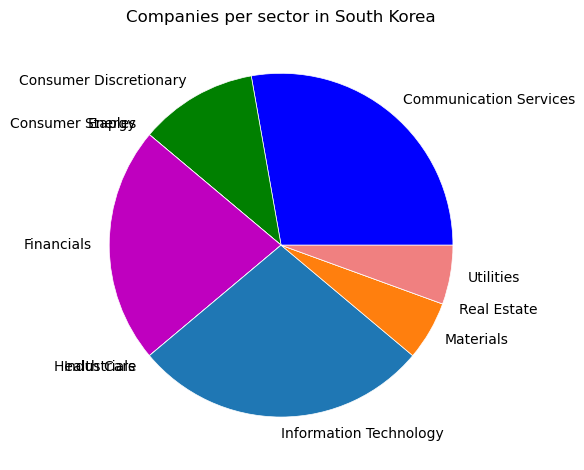

In [105]:
import matplotlib.pyplot as plt

equities_per_sector_korea = {}

for sector in equities.options(selection='sector', country='South Korea'):
    try:
        equities_per_sector_korea[sector] = len(equities.select(country='South Korea', sector=sector))
    except ValueError as error:
        print(error)

legend, values = zip(*equities_per_sector_korea.items())

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:gray',
          'lightcoral', 'yellow', 'saddlebrown', 'lightblue', 'olive']

plt.pie(values, labels=legend, colors=colors,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

plt.title('Companies per sector in South Korea')
plt.tight_layout()

plt.show()

In [77]:
# Obtain a selection from the database
equities_united_states = equities.select(country="United States") # 13140
display(equities_united_states.info(), equities_united_states)

<class 'pandas.core.frame.DataFrame'>
Index: 13140 entries, A to ZZZOF
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             13140 non-null  object
 1   summary          11207 non-null  object
 2   currency         13026 non-null  object
 3   sector           12160 non-null  object
 4   industry_group   12179 non-null  object
 5   industry         12176 non-null  object
 6   exchange         13140 non-null  object
 7   market           13140 non-null  object
 8   country          13140 non-null  object
 9   state            11264 non-null  object
 10  city             11263 non-null  object
 11  zipcode          11241 non-null  object
 12  website          9365 non-null   object
 13  market_cap       12281 non-null  object
 14  isin             2179 non-null   object
 15  cusip            1591 non-null   object
 16  figi             1451 non-null   object
 17  composite_figi   1450 non-null   obj

None

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
A,"Agilent Technologies, Inc.","Agilent Technologies, Inc. provides applicatio...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,NYQ,New York Stock Exchange,United States,CA,Santa Clara,95051,http://www.agilent.com,Large Cap,US00846U1016,00846U101,BBG000C2V541,BBG000C2V3D6,BBG001SCTQY4
AA,Alcoa Corporation,"Alcoa Corporation, together with its subsidiar...",USD,Materials,Materials,Metals & Mining,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212-5858,http://www.alcoa.com,Mid Cap,US0138721065,13872106,BBG00B3T3HK5,BBG00B3T3HD3,BBG00B3T3HF1
AABB,"Asia Broadband, Inc.","Asia Broadband Inc., through its subsidiary, A...",USD,Materials,Materials,Metals & Mining,PNK,OTC Bulletin Board,United States,NV,Las Vegas,89135,http://www.asiabroadbandinc.com,Micro Cap,NaN,NaN,NaN,NaN,NaN
AAC,Ares Acquisition Corporation,Ares Acquisition Corporation focuses on effect...,USD,Financials,Diversified Financials,Diversified Financial Services,NYQ,New York Stock Exchange,United States,NY,New York,10167,NaN,Small Cap,AU000000AAC9,NaN,NaN,NaN,NaN
AACI,Armada Acquisition Corp. I Common Stock,NaN,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NaN,NaN,NaN,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYJT,Zhong Ya International Limited,Zhong Ya International Limited does not have s...,USD,Financials,Diversified Financials,Diversified Financial Services,PNK,OTC Bulletin Board,United States,NV,Henderson,89074,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
ZYNE,"Zynerba Pharmaceuticals, Inc.","Zynerba Pharmaceuticals, Inc. operates as a cl...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,NGM,Nordic Growth Market,United States,PA,Devon,19333,http://zynerba.com,Nano Cap,US98986X1090,98986X109,NaN,NaN,NaN
ZYRX,"Zyrox Mining International, Inc.","WSPVA Bio Products International, LLC engages ...",USD,Consumer Discretionary,Automobiles & Components,Auto Components,PNK,OTC Bulletin Board,United States,CA,Monterey,93940,http://www.dissolvingplastic.com,Nano Cap,NaN,NaN,NaN,NaN,NaN


In [ ]:
unique_values = ['exchange', 'market', 'market_cap', 'isin', 'cusip', 'figi', 'composite_figi', 'shareclass_figi']

for uv in unique_values:
    print(uv, equities_united_states[uv].unique())

exchange ['NYQ' 'PNK' 'NMS' 'ASE' 'NGM' 'NCM' 'NYS' 'BTS' 'NAS' 'PCX']
market ['New York Stock Exchange' 'OTC Bulletin Board' 'NASDAQ Global Select'
 'NYSE MKT' 'Nordic Growth Market' 'NASDAQ Capital Market'
 'BATS BZX Exchange' 'NYSE Arca']
market_cap ['Large Cap' 'Mid Cap' 'Micro Cap' 'Small Cap' 'Nano Cap' nan 'Mega Cap']
isin ['US00846U1016' 'US0138721065' nan ... 'US98980G1022' 'US9898171015'
 'US98986X1090']
cusip ['00846U101' '13872106' nan ... '98980G102' '989817101' '98986X109']
figi ['BBG000C2V541' 'BBG00B3T3HK5' nan ... 'BBG00NTY6FH5' 'BBG00K4MD5L3'
 'BBG000PYXPR6']
composite_figi ['BBG000C2V3D6' 'BBG00B3T3HD3' nan ... 'BBG0042V6JM8' 'BBG003338H34'
 'BBG000PYX812']
shareclass_figi ['BBG001SCTQY4' 'BBG00B3T3HF1' nan ... 'BBG0042V6JN7' 'BBG003338H61'
 'BBG001SGPKJ9']


<exchange - market><br>
'NYQ' - New York Stock Exchange, 뉴욕증권거래소(NYSE)<br>
'NYS' - New York Stock Exchange<br>
'ASE' - NYSE MKT<br>
'PCX' - NYSE Arca<br>
<br><br>
'NAS' - NASDAQ Global Select(Small Cap, Micro Cap)<br>
'NMS' - NASDAQ Global Select(Nano Cap)<br>
'NCM' - NASDAQ Capital Market(NASDAQ-CM small cap, Micro Cap, Nano Cap)<br>
<br><br>
'NGM' - Nordic Growth Market<br>
<br><br>
'BTS' - BATS BZX Exchange<br>
<br><br>
'PNK' - OTC Bulletin Board, 미국 장외시장(Over-the-counter)<br>
<br><br>

<NASDAQ - Market tiers><br>
- Capital Market (NASDAQ-CM small cap)<br>
- Global Market (NASDAQ-GM mid cap)<br>
- Global Select Market (NASDAQ-GS large cap)

In [102]:
equities_united_states.loc[equities_united_states['exchange'] == 'NCM'].head(3)

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
ABEO,Abeona Therapeutics Inc.,"Abeona Therapeutics Inc., a clinical-stage bio...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,NCM,NASDAQ Capital Market,United States,NY,New York,10019,http://www.abeonatherapeutics.com,Micro Cap,FR0013185857,NaN,NaN,NaN,NaN
ABGI,ABG Acquisition Corp. I,ABG Acquisition Corp. I does not have signific...,USD,Financials,Diversified Financials,Diversified Financial Services,NCM,NASDAQ Capital Market,United States,NY,New York,10022,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
ABIO,"ARCA biopharma, Inc.","ARCA biopharma, Inc., a clinical-stage biophar...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,NCM,NASDAQ Capital Market,United States,CO,Westminster,80021,http://www.arcabio.com,Nano Cap,US00211Y5069,00211Y506,BBG000BWNWC7,BBG000BWNN28,BBG001SB1GL2


In [109]:
# market_cap ['Mega Cap' 'Large Cap' 'Mid Cap' 'Small Cap' 'Micro Cap' 'Nano Cap' nan]

NanoCap_df = equities.search(country='United States', market_cap='Nano Cap') # exchange='NYQ', summary='biotech', market_cap='Large Cap'
print(len(NanoCap_df)) # 5534
NanoCap_df.head()

MicroCap_df = equities.search(country='United States', market_cap='Micro Cap') # exchange='NYQ', summary='biotech', market_cap='Large Cap'
print(len(MicroCap_df)) # 3158
MicroCap_df.head()

5534
3158


,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
000004.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000665.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000851.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
002029.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
002447.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN


In [49]:
import financedatabase as fd

equities = fd.Equities()

financials = equities.search(sector='Financials',
                           country='United States',
                           market_cap='Mega Cap',
                           exclude_exchanges=True)

# financials = financials.reset_index(drop=False)
financials

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
BAC,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,BBG000BCTN44,BBG000BCTLF6,BBG001S5P0Y0
BAC-PA,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BAC-PB,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BAC-PE,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BAC-PK,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BAC-PL,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BACRP,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,PNK,OTC Bulletin Board,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BML-PG,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN
BML-PH,Bank of America Corporation,"Bank of America Corporation, through its subsi...",USD,Financials,Banks,Banks,NYQ,New York Stock Exchange,United States,NC,Charlotte,28255,http://www.bankofamerica.com,Mega Cap,NaN,NaN,NaN,NaN,NaN


In [55]:
financials_large = equities.search(sector='Financials',
                           country='United States',
                           market_cap='Large Cap',
                           exclude_exchanges=True)

# financials = financials.reset_index(drop=False)
financials_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, AFG to Y
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             157 non-null    object
 1   summary          151 non-null    object
 2   currency         157 non-null    object
 3   sector           157 non-null    object
 4   industry_group   157 non-null    object
 5   industry         157 non-null    object
 6   exchange         157 non-null    object
 7   market           157 non-null    object
 8   country          157 non-null    object
 9   state            151 non-null    object
 10  city             151 non-null    object
 11  zipcode          151 non-null    object
 12  website          151 non-null    object
 13  market_cap       157 non-null    object
 14  isin             33 non-null     object
 15  cusip            26 non-null     object
 16  figi             58 non-null     object
 17  composite_figi   58 non-null     object


In [56]:
financials_large['industry'].unique()

array(['Insurance', 'Consumer Finance', 'Capital Markets',
       'Diversified Financial Services', 'Banks',
       'Thrifts & Mortgage Finance'], dtype=object)

In [62]:
financials_large.loc[(financials_large['industry'] == 'Capital Markets') & (financials_large['exchange'] == 'NYQ')]

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
AMP,"Ameriprise Financial, Inc.","Ameriprise Financial, Inc., through its subsid...",USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,MN,Minneapolis,55474,http://www.ameriprise.com,Large Cap,US03076C1062,03076C106,BBG000G3QP92,BBG000G3QLY3,BBG001SK6096
APO,"Apollo Global Management, Inc.","Apollo Global Management, Inc. is a publicly o...",USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,NY,New York,10019,http://www.apollo.com,Large Cap,NaN,NaN,NaN,NaN,NaN
APO-PA,"Apollo Global Management, Inc.","Apollo Global Management, Inc. is a publicly o...",USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,NY,New York,10019,http://www.apollo.com,Large Cap,NaN,NaN,NaN,NaN,NaN
APO-PB,"Apollo Global Management, Inc.","Apollo Global Management, Inc. is a publicly o...",USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,NY,New York,10019,http://www.apollo.com,Large Cap,NaN,NaN,NaN,NaN,NaN
ARES,Ares Management Corporation,Ares Management Corporation operates as an alt...,USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,CA,Los Angeles,90067,http://www.aresmgmt.com,Large Cap,NaN,NaN,NaN,NaN,NaN
BEN,"Franklin Resources, Inc.","Franklin Resources, Inc. is a publicly owned a...",USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,CA,San Mateo,94403,http://www.franklinresources.com,Large Cap,AU000000BEN6,NaN,NaN,NaN,NaN
BGR,BlackRock Energy and Resources Trust,BlackRock Energy and Resources Trust is a clos...,USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,DE,Wilmington,19809,http://www.blackrock.com/investing/products/24...,Large Cap,KYG2112D1051,NaN,NaN,NaN,NaN
BK,The Bank of New York Mellon Corporation,The Bank of New York Mellon Corporation provid...,USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,NY,New York,10286,http://www.bnymellon.com,Large Cap,US0640581007,64058100,BBG000BD8QV8,BBG000BD8PN9,BBG001S5P6Q6
BLK,"BlackRock, Inc.","BlackRock, Inc. is a publicly owned investment...",USD,Financials,Diversified Financials,Capital Markets,NYQ,New York Stock Exchange,United States,NY,New York,10055,http://www.blackrock.com,Large Cap,US09247X1019,09247X101,BBG000C2PYL6,BBG000C2PW58,BBG001SDBP55


In [33]:
financials['industry'].unique()

array(['Banks', 'Insurance', 'Capital Markets', 'Consumer Finance'],
      dtype=object)

In [51]:
financials.loc[financials['industry'] == 'Capital Markets']

CapitalMarkets = financials.loc[financials['industry'] == 'Capital Markets']
CapitalMarkets

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
GOOI,"Gooi Global, Inc.","Gooi Global, Inc., through its subsidiary, Goo...",USD,Financials,Diversified Financials,Capital Markets,PNK,OTC Bulletin Board,United States,CA,Mountain View,94043,http://www.abc.xyz,Mega Cap,NaN,NaN,NaN,NaN,NaN


In [39]:
!pip install financetoolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 9.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.3
    Uninstalling pandas-1.4.3:
      Successfully uninstalled pandas-1.4.3


In [68]:
list(CapitalMarkets.index)

['GOOI']

In [71]:
from financetoolkit import Toolkit

API_KEY = "c4fbee0222bd5a6a86573fbbc7417b8a"
data_set = {}

companies = Toolkit('GOOG', API_KEY)

In [72]:
companies.get_balance_sheet_statement()

date,2018,2019,2020,2021,2022
Cash and Cash Equivalents,16701000000,18498000000,26465000000,20945000000,21879000000
Short Term Investments,92439000000,101177000000,110229000000,118704000000,91883000000
Cash and Short Term Investments,109140000000,119675000000,136694000000,139649000000,113762000000
Accounts Receivable,21193000000,27492000000,31384000000,40270000000,40258000000
Inventory,1107000000,999000000,728000000,1170000000,2670000000
Other Current Assets,4236000000,4412000000,5490000000,7054000000,8105000000
Total Current Assets,135676000000,152578000000,174296000000,188143000000,164795000000
"Property, Plant and Equipment",59719000000,84587000000,96960000000,110558000000,127049000000
Goodwill,17888000000,20624000000,21175000000,22956000000,28960000000
Intangible Assets,2220000000,1979000000,1445000000,1417000000,2084000000
